 # Import libraries


In [12]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


 # Load data

In [14]:
df = pd.read_csv('TSLA.csv')
data = df.filter(['Close']).values


# Preprocess data

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

# Prepare data

In [16]:
prediction_days = 60
x_train = []
y_train = []

for i in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[i-prediction_days:i, 0])
  y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


# Train model

In [17]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)


Epoch 1/25
6/6 [==============================] - 11s 98ms/step - loss: 0.1186
Epoch 2/25
6/6 [==============================] - 1s 96ms/step - loss: 0.0324
Epoch 3/25
6/6 [==============================] - 1s 112ms/step - loss: 0.0197
Epoch 4/25
6/6 [==============================] - 1s 96ms/step - loss: 0.0166
Epoch 5/25
6/6 [==============================] - 1s 104ms/step - loss: 0.0136
Epoch 6/25
6/6 [==============================] - 1s 98ms/step - loss: 0.0121
Epoch 7/25
6/6 [==============================] - 1s 98ms/step - loss: 0.0106
Epoch 8/25
6/6 [==============================] - 1s 94ms/step - loss: 0.0094
Epoch 9/25
6/6 [==============================] - 1s 102ms/step - loss: 0.0082
Epoch 10/25
6/6 [==============================] - 1s 98ms/step - loss: 0.0083
Epoch 11/25
6/6 [==============================] - 1s 187ms/step - loss: 0.0076
Epoch 12/25
6/6 [==============================] - 1s 138ms/step - loss: 0.0073
Epoch 13/25
6/6 [==============================] - 1s 1

# Make prediction

In [18]:
test_data = scaled_data[-prediction_days:]
test_data = np.reshape(test_data, (1, prediction_days, 1))
predictions = []

for i in range(30):
  prediction = model.predict(test_data)
  predictions.append(prediction)
  test_data = np.append(test_data[:,1:,:], prediction.reshape(1,1,1), axis=1)

predictions = np.array(predictions)
predictions = scaler.inverse_transform(predictions.reshape(30, 1))


1/1 [==============================] - 0s 80ms/step


# Plot results

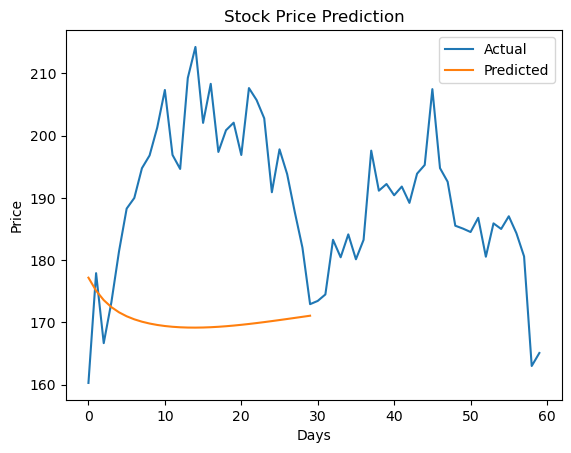

In [19]:
plt.plot(df['Close'].values[-prediction_days:])
plt.plot(predictions)
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend(['Actual', 'Predicted'])
plt.show()